In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import os

In [10]:
# Replace with your actual file names
file1 = "C:/Users/HP/10 Acadamy PRojects/New folder (11)/FinSight-Forecaster/data/processed/BND_cleaned.csv"
file2 = "C:/Users/HP/10 Acadamy PRojects/New folder (11)/FinSight-Forecaster/data/processed/SPY_cleaned.csv"
file3 = "C:/Users/HP/10 Acadamy PRojects/New folder (11)/FinSight-Forecaster/data/processed/TSLA_cleaned.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Quick check
df1.head(), df2.head(), df3.head()


(        Price      Close       High        Low       Open     Volume
 0        Date        NaN        NaN        NaN        NaN        NaN
 1  2015-07-01  60.816776  60.914502  60.764154  60.794225  5399300.0
 2  2015-07-02  60.967083  61.027225  60.937012  60.937012  1060100.0
 3  2015-07-06  61.177567  61.222676  61.057289  61.222676  2210700.0
 4  2015-07-07  61.237679  61.470720  61.237679  61.410584  4183200.0,
         Price       Close        High         Low        Open       Volume
 0        Date         NaN         NaN         NaN         NaN          NaN
 1  2015-07-01  174.917145  175.363920  174.124747  175.111025  135979900.0
 2  2015-07-02  174.756958  175.566219  174.335471  175.397627  104373700.0
 3  2015-07-06  174.259583  175.043542  173.256441  173.458760  117975400.0
 4  2015-07-07  175.355453  175.481894  172.059422  174.461903  173820200.0,
         Price      Close       High        Low       Open       Volume
 0        Date        NaN        NaN        NaN   

In [11]:
# Stack them vertically
df = pd.concat([df1, df2, df3], ignore_index=True)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

df.head()


,Price,Close,High,Low,Open,Volume
0,Date,NaN,NaN,NaN,NaN,NaN
1,2015-07-01,60.816776,60.914502,60.764154,60.794225,5399300.0
2,2015-07-02,60.967083,61.027225,60.937012,60.937012,1060100.0
3,2015-07-06,61.177567,61.222676,61.057289,61.222676,2210700.0
4,2015-07-07,61.237679,61.470720,61.237679,61.410584,4183200.0


In [12]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())


Shape: (7606, 6)

Data Types:
 Price      object
Close     float64
High      float64
Low       float64
Open      float64
Volume    float64
dtype: object

Missing values:
 Price     0
Close     1
High      1
Low       1
Open      1
Volume    1
dtype: int64


In [13]:
df.describe()


,Close,High,Low,Open,Volume
count,7605.000000,7605.000000,7605.000000,7605.000000,7.605000e+03
mean,178.208641,179.837740,176.439129,178.199176,6.788282e+07
std,151.805674,153.033414,150.457746,151.799505,6.784301e+07
min,9.578000,10.331333,9.403333,9.488000,0.000000e+00
25%,64.718079,64.791276,64.633123,64.726049,5.890700e+06
50%,94.571335,97.666664,91.734001,94.400665,6.240820e+07
75%,264.350006,267.309998,261.211378,264.350006,9.666270e+07
max,637.099976,638.669983,635.539978,638.349976,9.140820e+08


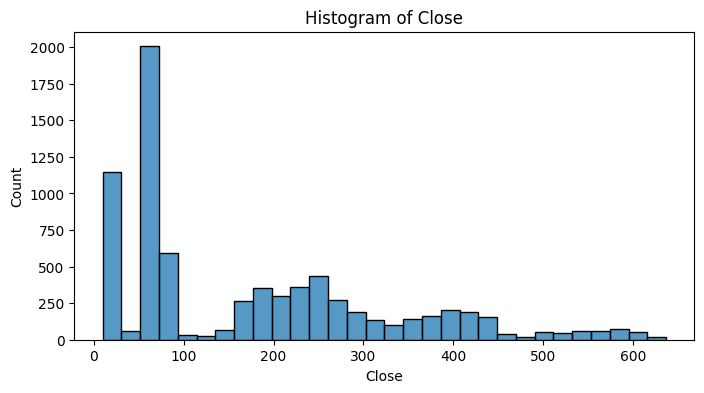

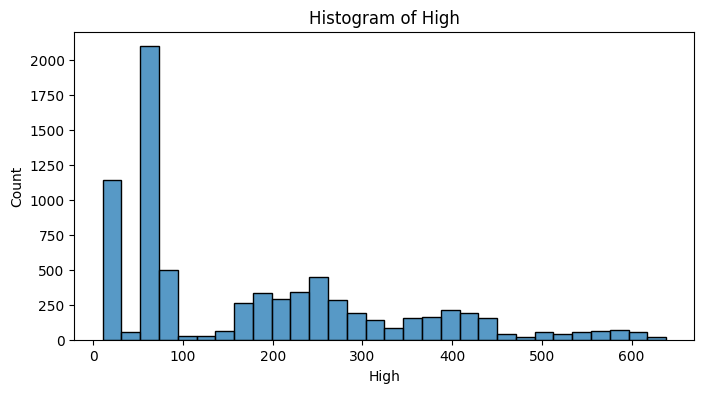

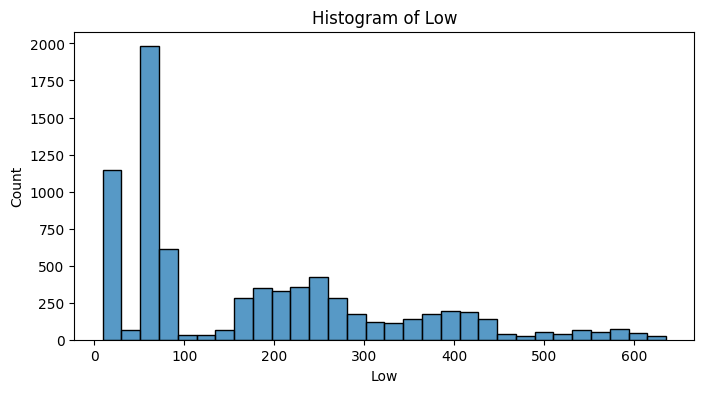

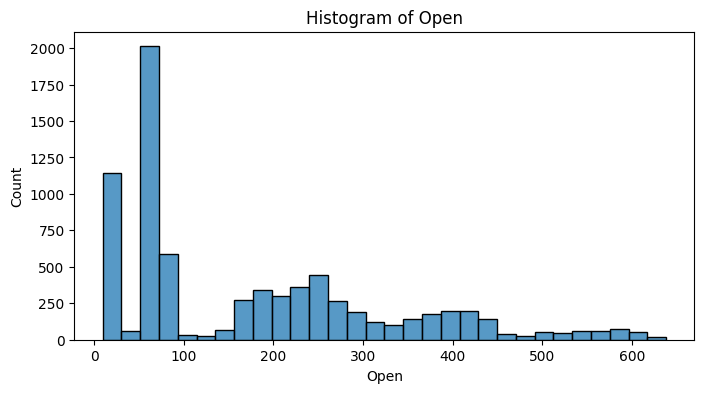

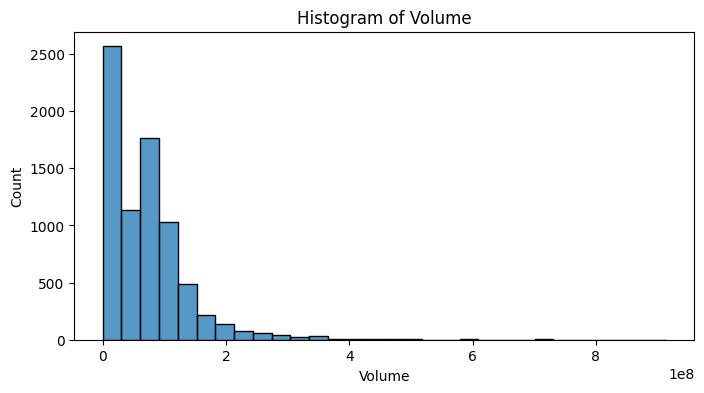

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in numeric_cols:
    clean_col = pd.to_numeric(df[col], errors='coerce').dropna()
    if not clean_col.empty:
        plt.figure(figsize=(8,4))
        sns.histplot(clean_col, bins=30, kde=False)
        plt.title(f'Histogram of {col}')
        plt.show()


In [18]:
import numpy as np
import pandas as pd

for col in numeric_cols:
    # Convert to numeric and drop NaNs
    clean_col = pd.to_numeric(df[col], errors='coerce').dropna()
    
    if clean_col.empty:
        print(f"\n=== Skipping {col} (no numeric data) ===")
        continue

    print(f"\n=== Histogram data for {col} ===")
    counts, bin_edges = np.histogram(clean_col, bins=30)

    for i in range(len(counts)):
        print(f"{bin_edges[i]:.2f} – {bin_edges[i+1]:.2f}: {counts[i]} values")



=== Skipping Price (no numeric data) ===

=== Histogram data for Close ===
9.58 – 30.50: 1144 values
30.50 – 51.41: 60 values
51.41 – 72.33: 2005 values
72.33 – 93.25: 592 values
93.25 – 114.16: 32 values
114.16 – 135.08: 26 values
135.08 – 156.00: 64 values
156.00 – 176.92: 263 values
176.92 – 197.83: 351 values
197.83 – 218.75: 299 values
218.75 – 239.67: 360 values
239.67 – 260.59: 435 values
260.59 – 281.50: 272 values
281.50 – 302.42: 192 values
302.42 – 323.34: 134 values
323.34 – 344.26: 103 values
344.26 – 365.17: 142 values
365.17 – 386.09: 165 values
386.09 – 407.01: 202 values
407.01 – 427.93: 191 values
427.93 – 448.84: 152 values
448.84 – 469.76: 37 values
469.76 – 490.68: 22 values
490.68 – 511.60: 53 values
511.60 – 532.51: 43 values
532.51 – 553.43: 60 values
553.43 – 574.35: 62 values
574.35 – 595.27: 72 values
595.27 – 616.18: 50 values
616.18 – 637.10: 22 values

=== Histogram data for High ===
10.33 – 31.28: 1140 values
31.28 – 52.22: 58 values
52.22 – 73.17: 2100 

In [30]:
print(df.head())
print(df.columns)


        Price      Close       High        Low       Open     Volume  \
0        Date        NaN        NaN        NaN        NaN        NaN   
1  2015-07-01  60.816776  60.914502  60.764154  60.794225  5399300.0   
2  2015-07-02  60.967083  61.027225  60.937012  60.937012  1060100.0   
3  2015-07-06  61.177567  61.222676  61.057289  61.222676  2210700.0   
4  2015-07-07  61.237679  61.470720  61.237679  61.410584  4183200.0   

   High_Low_Spread  
0              NaN  
1         0.150348  
2         0.090212  
3         0.165386  
4         0.233041  
Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume', 'High_Low_Spread'], dtype='object')


# Distribution plots

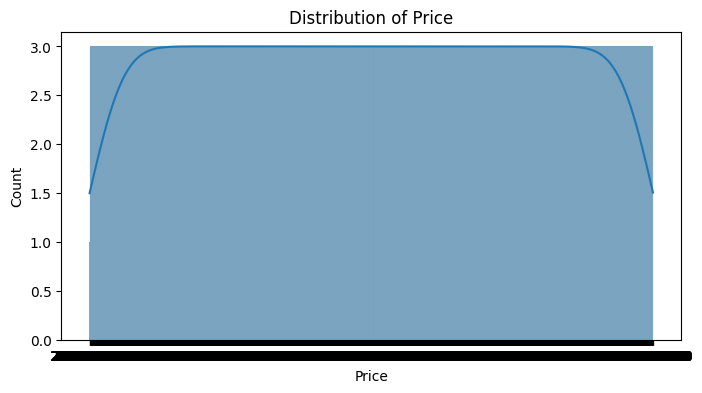

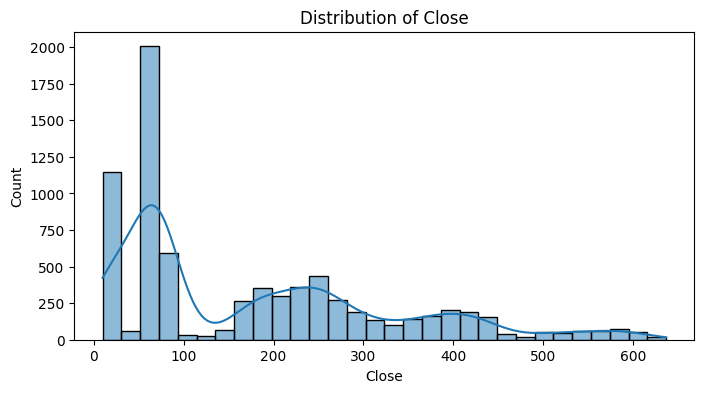

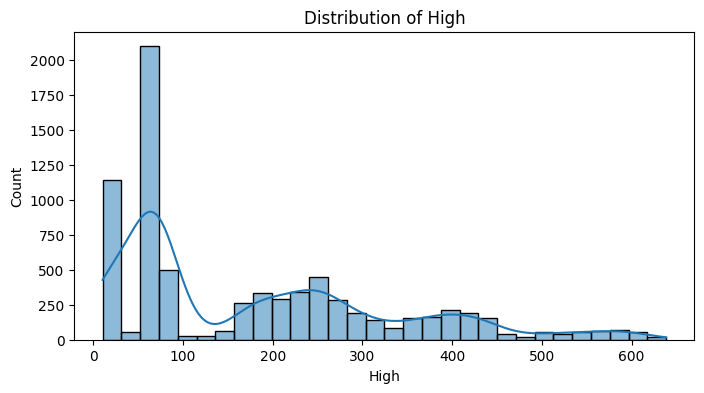

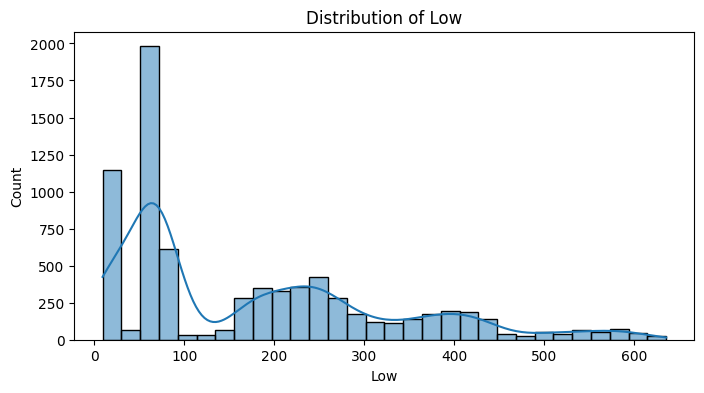

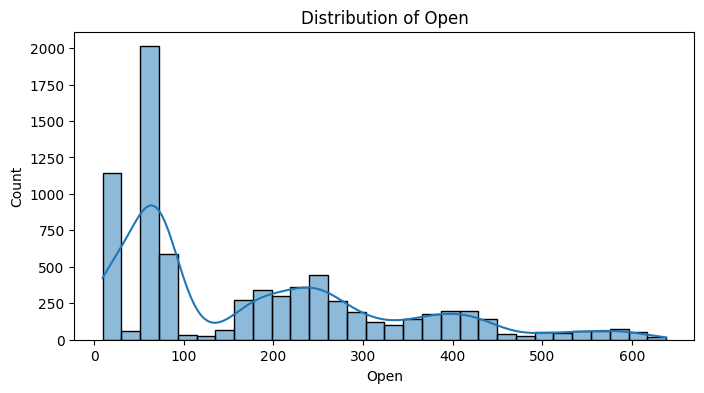

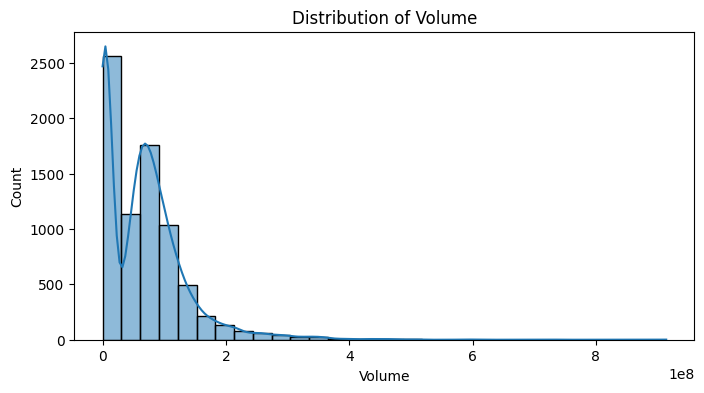

In [40]:
numeric_cols = ['Price', 'Close', 'High', 'Low', 'Open', 'Volume']

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()


# Correlation heatmap

In [38]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


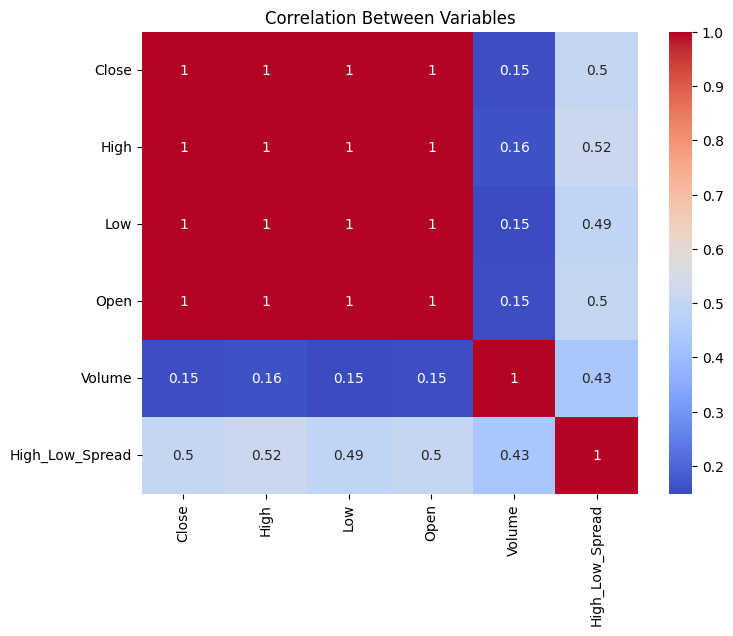

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Variables")
plt.show()

# Price trends per ticker

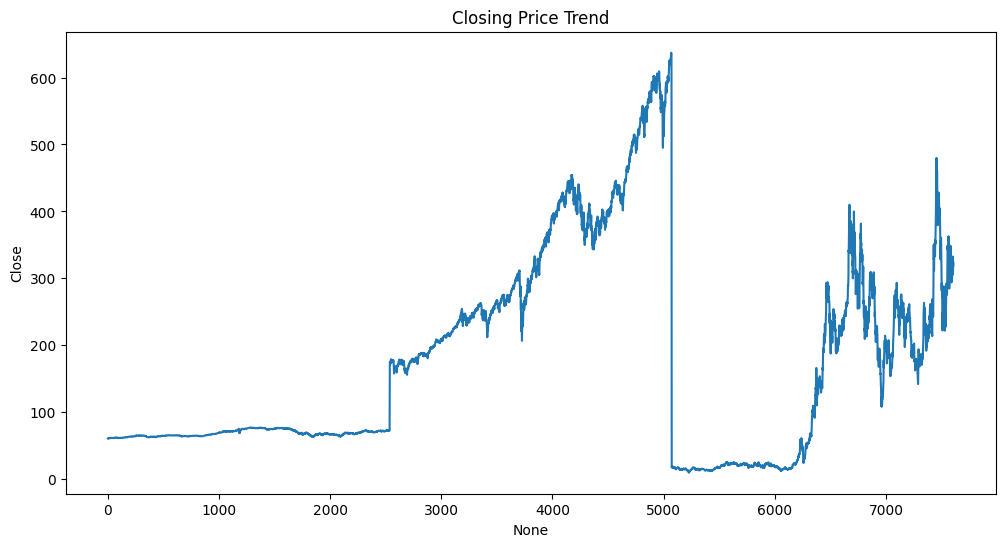

In [37]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x=df.index, y='Close')
plt.title("Closing Price Trend")
plt.show()


# High-Low spread per ticker

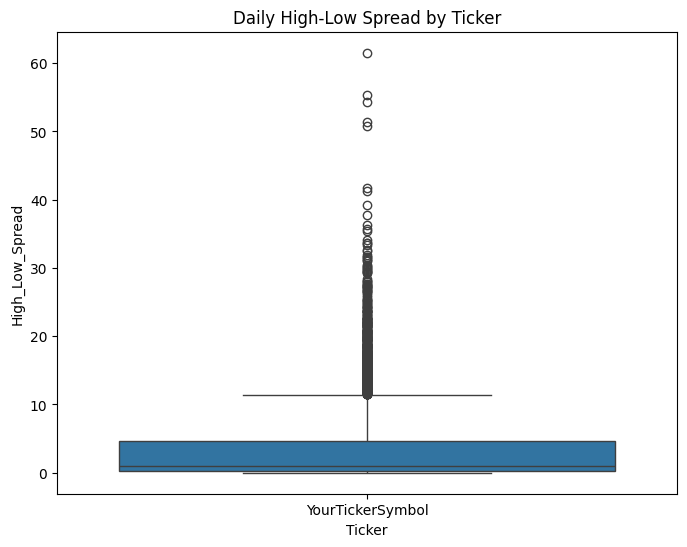

In [32]:
df['Ticker'] = 'YourTickerSymbol'  # replace with actual ticker string

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x='Ticker', y='High_Low_Spread')
plt.title("Daily High-Low Spread by Ticker")
plt.show()


# Volume vs Price scatter

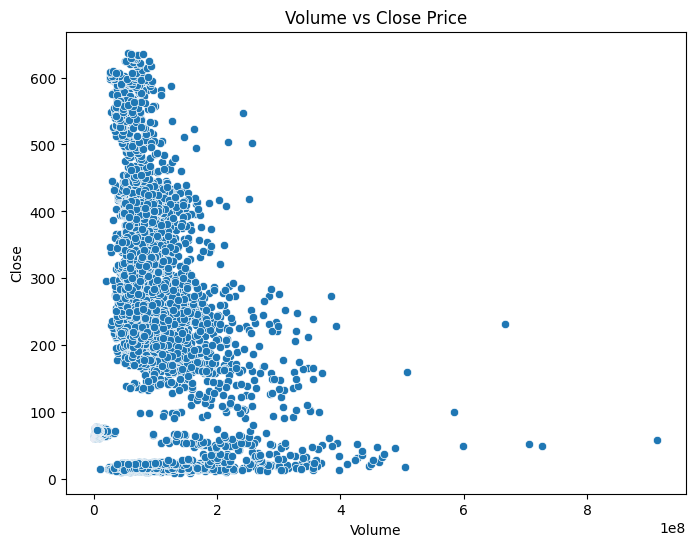

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title("Volume vs Close Price")
plt.show()

